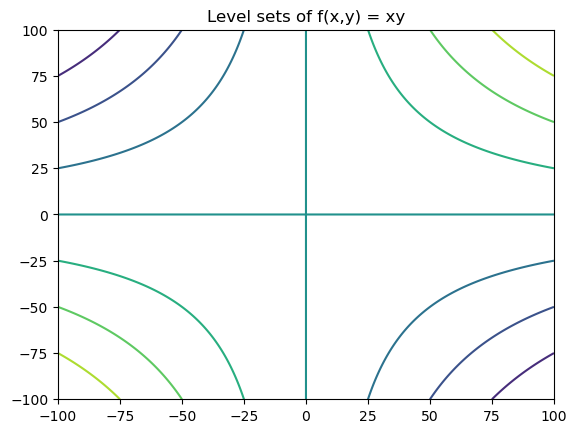

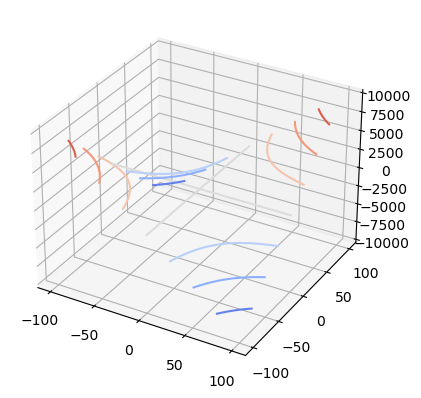

In [17]:
# Q2 1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
xlist = np.linspace(-100.0, 100.0, 1000)
ylist = np.linspace(-100.0, 100.0, 1000)
X, Y = np.meshgrid(xlist, ylist)

Z = X*Y

fig,ax=plt.subplots(1,1)
ax.contour(X, Y, Z)
ax.set_title('Level sets of f(x,y) = xy')
plt.show()


ax = plt.figure().add_subplot(projection='3d')
ax.contour(X, Y, Z, cmap=cm.coolwarm)  
plt.show()

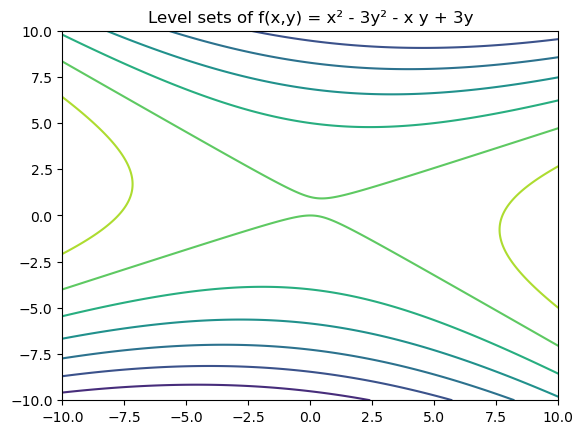

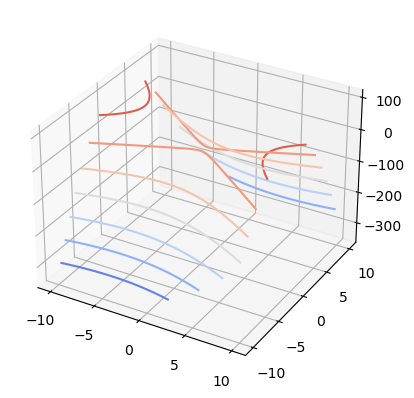

In [18]:
# Q2 2
xlist = np.linspace(-10.0, 10.0, 5000)
ylist = np.linspace(-10.0, 10.0, 5000)
X, Y = np.meshgrid(xlist, ylist)
Z = (X**2)-(3*(Y**2))-(X*Y)+(3*Y)
fig,ax=plt.subplots(1,1)
ax.contour(X, Y, Z)
ax.set_title('Level sets of f(x,y) = x² - 3y² - x y + 3y')
plt.show()
ax = plt.figure().add_subplot(projection='3d')
ax.contour(X, Y, Z, cmap=cm.coolwarm)  
plt.show()

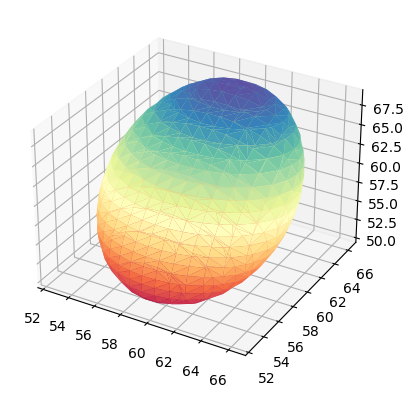

In [19]:
# Q2 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from skimage import measure

x_1 = np.linspace(-5, 5, 100)
x_2 = np.linspace(-5, 5, 100)
x_3 = np.linspace(-5, 5, 100)
x_1,x_2,x_3 = np.meshgrid(x_1,x_2,x_3)
x = np.transpose(np.array([x_1,x_2,x_3]))
mean = np.array([1,1,1])
cov = np.matrix([[1,1,0], [1,2,0], [0,0,1]])
y= multivariate_normal.pdf(x, mean=mean, cov=cov)
iso_val=0.05
verts, faces, normals, values = measure.marching_cubes(y, iso_val)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)

plt.show()

In [ ]:
#q5

In [3]:
import math
from math import *

In [4]:
def f(x1, x2):
    return (x1**2)-(x1*x2)+(3*(x2**2))+5

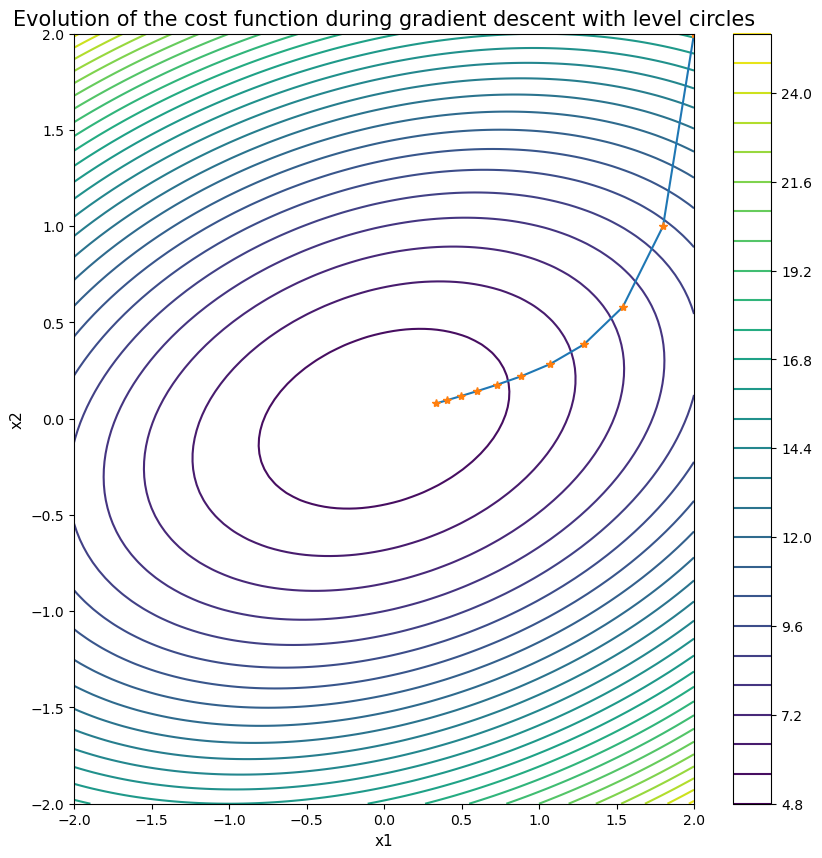

In [25]:
#Q5 1
def gradient(x1, x2):
    return np.array([2*x1- x2, 6*x2-x1])


x1, x2 = 2,2
t = 0.1 #alpha

grad_f = gradient(x1, x2)

i = 0
evolution_X1_X2 = [[x1, x2]]

while i<10:
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    i +=1


evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]
xlist = np.linspace(-2,2, 100)
ylist = np.linspace(-2,2, 100)
X1, X2 = np.meshgrid(xlist, ylist)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,10))
contours = plt.contour(X1, X2, Z, 30)


plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*')
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.show()

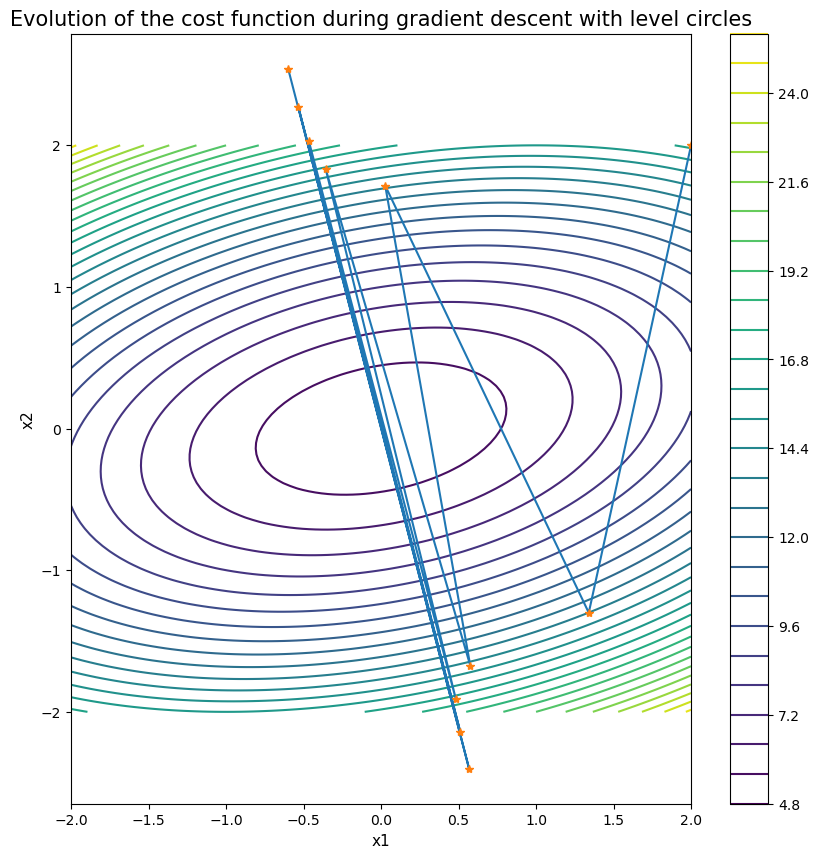

In [28]:
#Q5 2
# big step size leads to divergence
def gradient(x1, x2):
    return np.array([2*x1- x2, 6*x2-x1])


x1, x2 = 2,2
t = 0.33 #alpha

grad_f = gradient(x1, x2)

i = 0
evolution_X1_X2 = [[x1, x2]]

while i<10:
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    i +=1


evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]
xlist = np.linspace(-2,2, 100)
ylist = np.linspace(-2,2, 100)
X1, X2 = np.meshgrid(xlist, ylist)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,10))
contours = plt.contour(X1, X2, Z, 30)


plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*')
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.show()

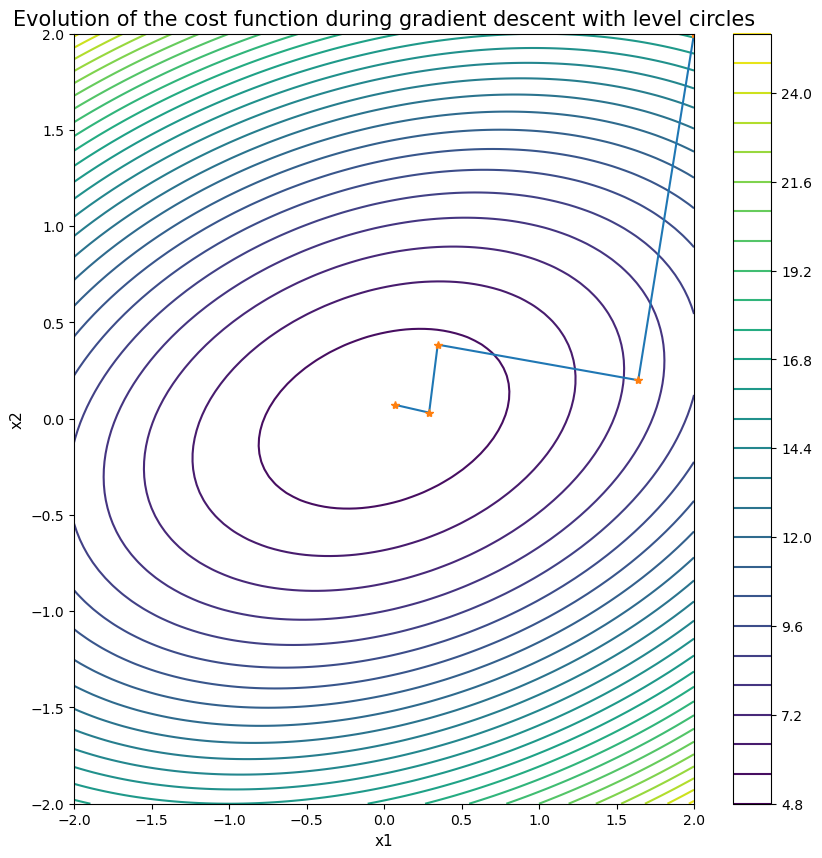

In [32]:
#Q5 3
def gradient(x1, x2):
    return np.array([(2*x1- x2), (6*x2-x1)])


x1, x2 = 2,2
grad_f = gradient(x1, x2)

i = 0
evolution_X1_X2 = [[x1, x2]]
epsilon = 0.1

while True:
    
    direction = -grad_f
    all_t = [i/100 for i in range(1,100)]
    min_angle, min_t = float('inf'), 1
    for t in all_t:

        x, y = x1 + t*direction[0], x2 + t*direction[1] 
        angle = np.dot(-gradient(x, y),direction)
        if abs(angle-0) < min_angle:
             min_angle, min_t = angle,t
    t = min_t # alpha
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    
    if len(evolution_X1_X2) > 2 and  (abs(x1-evolution_X1_X2[-1][0]) < epsilon) and (abs(x2-evolution_X1_X2[-1][1]) < epsilon):
        break
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)



evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

xlist = np.linspace(-2,2, 100)
ylist = np.linspace(-2,2, 100)
X1, X2 = np.meshgrid(xlist, ylist)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,10))
contours = plt.contour(X1, X2, Z, 30)


plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*')
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()

plt.show()


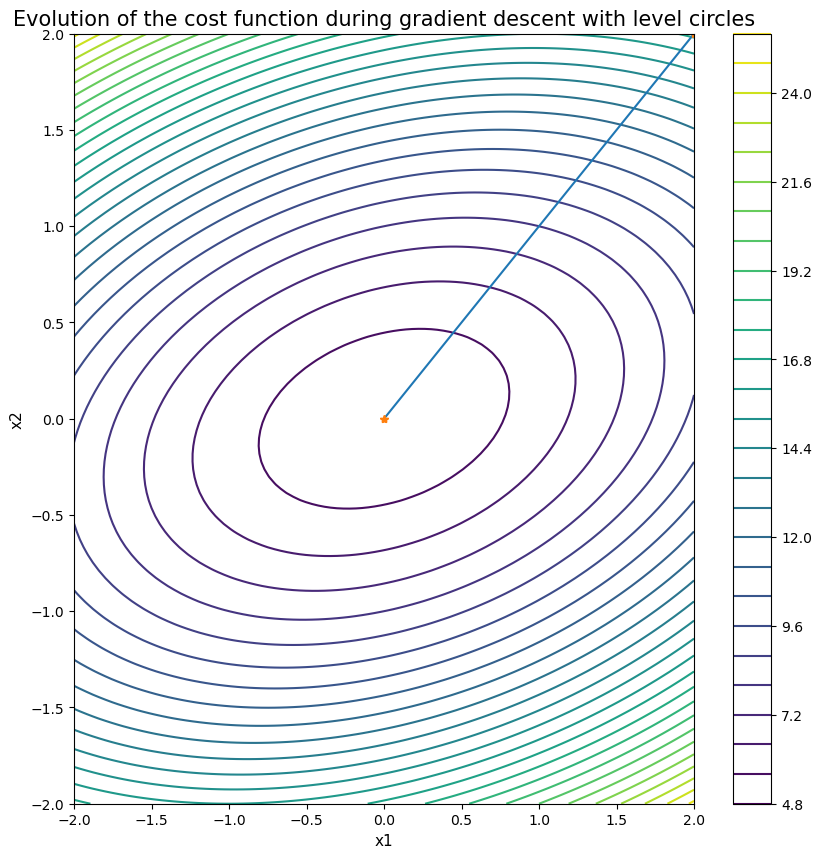

In [34]:
#Q5 4
from numpy.linalg import inv
def gradient(x1, x2):
    return np.array([(2*x1- x2), (6*x2-x1)])

def hessian(x1, x2):
    return [[2, -1], [-1, 6]]


x1, x2 = 2,2
t = 1 
grad_f = gradient(x1, x2)
hessian_f = hessian(x1,x2)


evolution_X1_X2 = [[x1, x2]]
epsilon = 0.01

while True:
    
    direction = np.dot(-inv(hessian_f),grad_f)

    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    
    if len(evolution_X1_X2) > 2 and  (abs(x1-evolution_X1_X2[-1][0]) < epsilon) and (abs(x2-evolution_X1_X2[-1][1]) < epsilon):
        break
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    hessian_f = hessian(x1,x2)


evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

xlist = np.linspace(-2,2, 100)
ylist = np.linspace(-2,2, 100)
X1, X2 = np.meshgrid(xlist, ylist)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,10))
contours = plt.contour(X1, X2, Z, 30)


plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*')
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()

plt.show()
